## Understanding Dataset aka EDA

**Note** - `EDA is about answering questions related to data and not about just plotting figures.`

In [1]:
# !pip install ipywidgets 
# !pip install wordcloud

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter
import pandas as pd
import itertools 
from ipywidgets import widgets
from wordcloud import WordCloud, STOPWORDS

import warnings 
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('train_data.csv')
df.columns

Index(['Diseases', 'b_0', 'b_1', 'b_2', 'b_3', 'b_4', 'b_5', 'b_6', 'b_7',
       'b_8',
       ...
       'g_14', 'g_15', 'g_16', 'g_17', 'fm_0', 'fm_1', 'fm_2', 'fm_3', 'fm_4',
       'fm_5'],
      dtype='object', length=190)

**Q-1 : How many symptoms are there for each disease , we care about this because we want to know the display relevent number of options only to user**


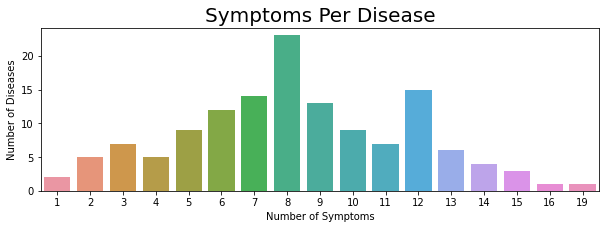

In [4]:
# Symptoms per disease 
diseases = df.Diseases.values 
num_of_symptoms_per_disease = [ df.iloc[[i],1:].values.sum() for i in range(len(df)) ] 
num_symptoms, num_diseases = zip( *Counter(num_of_symptoms_per_disease).items())
plt.figure(figsize=(10,3))
ax = sns.barplot(list(num_symptoms), list(num_diseases))
plt.title("Symptoms Per Disease", fontsize=20)
plt.xlabel("Number of Symptoms", fontsize=10)
plt.ylabel("Number of Diseases",fontsize=10)
plt.show()

**Q-2 - What are the most popular symptoms ? we want to know this it is important to know the distribution
which may help us find answer to question like if we should keep a symptom or not etc.**

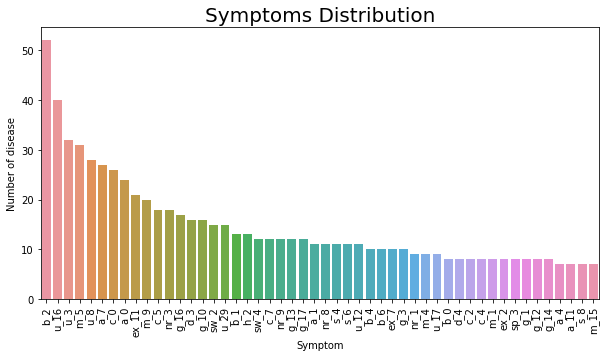

In [5]:
# Distribution of symptoms 
all_symptoms_counts = { col : df.loc[:,col].sum() for col in df.columns[1:] }  # excluding 'Diseases' column
symptoms, symptoms_count = zip(*Counter(all_symptoms_counts).most_common())
plt.figure(figsize=(10,5))
ax = sns.barplot(list(symptoms)[:50],list(symptoms_count)[:50]) # Top 50 
ax.set_xticklabels(symptoms[:50],rotation=90,fontsize=10)
plt.title("Symptoms Distribution",fontsize=20)
plt.xlabel("Symptom",fontsize=10)
plt.ylabel("Number of disease",fontsize=10)
plt.show()

# To know more about these symbols see the dataset `symptoms.csv`

**Q-3 - Is there enough indication that these symptoms are relevent to disease we are trying to predict? Here we have compared one or two line description of diseases to determine relevance of symptoms**

In [6]:
diseases_description = pd.read_csv('diseases_description.csv')
diseases_description.head(2)

,Diseases,Description
0,accident_cerebrovascular,damage to brain from interruption of its blood...
1,adenocarcinoma,type of cancer that starts in mucus producing ...


In [7]:
symptoms_description = pd.read_csv('Symptoms.csv').loc[1:,['Code','Description']] 
symptoms_description.head()

,Code,Description
1,b_0,pain in breathing
2,b_1,breathing faster than usual
3,b_2,shortness of breath
4,b_3,involuntary breathing stops for 1 minutes or more
5,b_4,breathlessness in certain posture/position


In [8]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


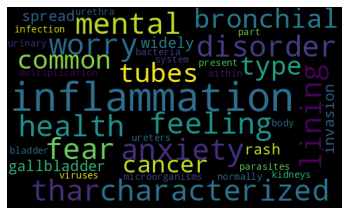

In [9]:
# Strategy : 
desc_to_code = {desc:code for desc,code in zip(symptoms_description.Description.values,symptoms_description.Code.values)}

@widgets.interact(symptom_desc= list(symptoms_description.Description.values))
def display_word_cloud(symptom_desc): 
    code = desc_to_code[symptom_desc]
    subset_diseases = [df.loc[i,'Diseases'] for i in range(len(df))  if df.loc[i,code]==1 ]
    subset = diseases_description[ [True if (diseases_description.loc[i,'Diseases'] in subset_diseases)  else False for i in range(len(diseases_description))] ]
    text = subset.Description.values
    cloud = WordCloud(
        stopwords=STOPWORDS, background_color="black", collocations=False,
        width=500, height=300).generate(" ".join(text))
    plt.axis("off")
    plt.imshow(cloud)


In [10]:
len(diseases_description)

141

In [11]:
@widgets.interact(symptom_desc= list(symptoms_description.Description.values))
def display_word_cloud(symptom_desc='pain in breathing'): 
    return symptom_desc


'pain in breathing'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a12a1b37-24ed-400a-a1a4-4803ffdccc47' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>